In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(322)
# Constants
seat_capacity = 250
ticket_price = 600
fixed_cost = 70000

N = 10000  # Number of simulations

def simulate_noshows(num_simulations):
    """
    Simulate no-shows using the given distribution parameters.
    No-shows are independent of booking level based on your data.
    """
    mean_noshows = 14.09
    std_noshows = 3.78
    no_shows = np.random.normal(mean_noshows, std_noshows, num_simulations)
    # Ensure no-shows are non-negative and reasonable
    no_shows = np.clip(no_shows, 0, None)
    return no_shows.astype(int)

def calculate_compensation_per_passenger(num_bumped):
    """
    Calculate compensation per passenger based on number of people bumped.
    Uses exponential model to reflect increasing compensation with more bumps.
    """
    if num_bumped <= 0:
        return 0
    
    # Exponential model: compensation increases with more bumped passengers
    base_compensation = 50
    growth_factor = 0.2
    
    compensation_per_passenger = base_compensation * np.exp(growth_factor * num_bumped)
    
    # Cap at maximum observed compensation
    compensation_per_passenger = min(compensation_per_passenger, 923)
    
    return compensation_per_passenger

def simulate_profit(bookings, num_simulations):
    """
    Simulate profit for a given number of bookings
    """
    # Generate no-shows for all simulations
    noshows = simulate_noshows(num_simulations)
    
    profits = []
    
    for no_show in noshows:
        # Calculate passengers who show up
        show_up = bookings - no_show
        
        # Calculate passengers who can board (limited by capacity)
        boarded = min(show_up, seat_capacity)
        
        # Calculate number of passengers bumped
        bumped = max(0, show_up - seat_capacity)
        
        # Calculate revenue from passengers who board
        revenue = boarded * ticket_price
        
        # Calculate total compensation
        if bumped > 0:
            compensation_per_passenger = calculate_compensation_per_passenger(bumped)
            total_compensation = bumped * compensation_per_passenger
        else:
            total_compensation = 0
        
        # Calculating profit 
        profit = revenue - total_compensation - fixed_cost
        profits.append(profit)
    
    return np.array(profits)

# Running simulation for the focused range (265-275) as per your analysis from excel
print("Southwest Airlines Overbooking Simulation")
print("=" * 50)

# Focusing on the range 
booking_range = range(265, 276)  
results = []

for bookings in booking_range:
    profits = simulate_profit(bookings, N)
    
    avg_profit = np.mean(profits)
    std_profit = np.std(profits)
    min_profit = np.min(profits)
    max_profit = np.max(profits)
    
    results.append({
        'bookings': bookings,
        'overbook': bookings - seat_capacity,
        'avg_profit': avg_profit,
        'std_profit': std_profit,
        'min_profit': min_profit,
        'max_profit': max_profit
    })
    
    print(f"Bookings: {bookings} (Overbook: {bookings - seat_capacity})")
    print(f"  Avg Profit: ${avg_profit:,.2f}")
    print()

Southwest Airlines Overbooking Simulation
Bookings: 265 (Overbook: 15)
  Avg Profit: $79,048.75

Bookings: 266 (Overbook: 16)
  Avg Profit: $79,069.36

Bookings: 267 (Overbook: 17)
  Avg Profit: $78,958.09

Bookings: 268 (Overbook: 18)
  Avg Profit: $78,676.59

Bookings: 269 (Overbook: 19)
  Avg Profit: $78,336.03

Bookings: 270 (Overbook: 20)
  Avg Profit: $77,760.32

Bookings: 271 (Overbook: 21)
  Avg Profit: $77,128.11

Bookings: 272 (Overbook: 22)
  Avg Profit: $76,277.41

Bookings: 273 (Overbook: 23)
  Avg Profit: $75,339.44

Bookings: 274 (Overbook: 24)
  Avg Profit: $74,215.04

Bookings: 275 (Overbook: 25)
  Avg Profit: $72,967.83



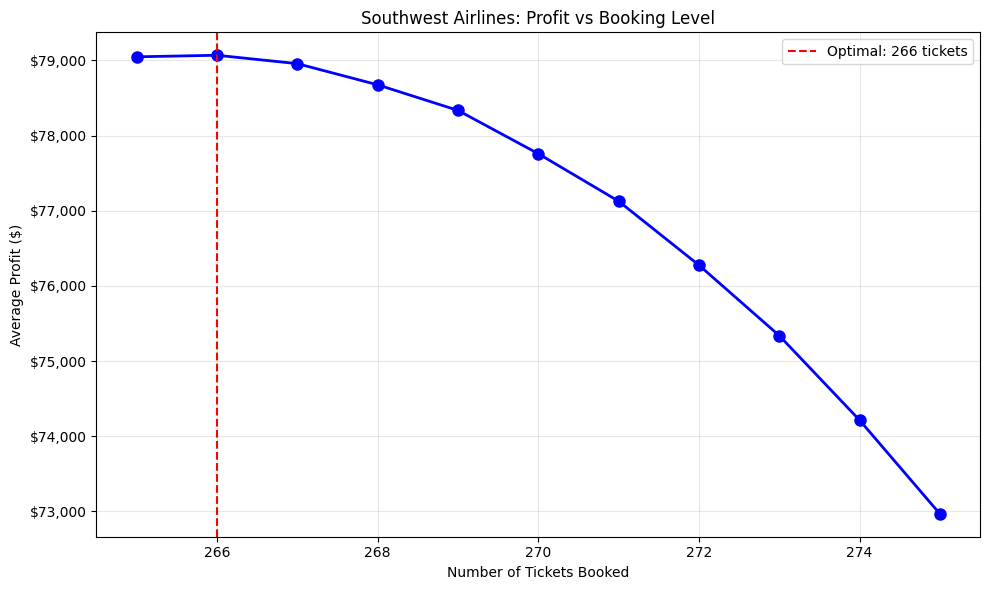


Optimal booking level: 266 tickets
Expected profit: $79,069.36


In [12]:

# Convert results to DataFrame for easy plotting
df = pd.DataFrame(results)

# Find optimal booking level
optimal_booking = df.loc[df['avg_profit'].idxmax(), 'bookings']

# Create simple graph
plt.figure(figsize=(10, 6))
plt.plot(df['bookings'], df['avg_profit'], 'bo-', linewidth=2, markersize=8)
plt.axvline(optimal_booking, color='red', linestyle='--', 
            label=f'Optimal: {optimal_booking} tickets')

plt.xlabel('Number of Tickets Booked')
plt.ylabel('Average Profit ($)')
plt.title('Southwest Airlines: Profit vs Booking Level')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

print(f"\nOptimal booking level: {optimal_booking} tickets")
print(f"Expected profit: ${df.loc[df['avg_profit'].idxmax(), 'avg_profit']:,.2f}")